提高积分精度, 由 $10^{-1}$ 提高到 $10^{-3}$

y_ 0 = -0.20821176746643827
y_ 1 = -0.2546885897400767
y_ 2 = -0.31259245445853184
y_ 3 = -0.3849940409035174
y_ 4 = -0.47590832846836767
y_ 5 = -0.5906534153204736
y_ 6 = -0.736399457961712
y_ 7 = -0.9230494870718764
y_ 8 = -1.1646291801644826
y_ 9 = -1.4818183321225176
y_ 10 = -1.9072201526176196
y_ 11 = -2.4955778518570892
y_ 12 = -3.35661866527285
y_ 13 = -4.764190816075446
y_ 14 = -8.619365234729138


/root/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


y_ 15 = -31.689225608993702
y_ 16 = -42.6228856715649
y_ 17 = -51.11815692668077
y_ 18 = -58.33792995921695
y_ 19 = -64.74486975265324


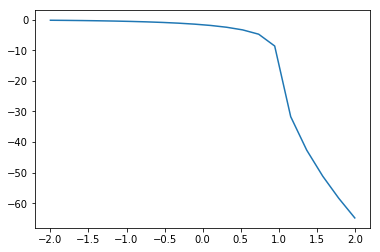

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
#from scipy.misc import derivative


beta = 1
er = 1e-6
R = 1/30
epsabs = 1e-3

def xi(k, mu):
    return k**2 - mu
def n(k, mu):
    return 1 / (np.exp(beta*xi(k, mu)) - 1)
def z(omega, q, mu):
    return omega - q**2/2 + 2*mu

def pi(omega, q, k, mu):
    pi = 1 + n(k+q/2, mu) + n(-k+q/2, mu)
    pi = pi / (xi(k+q/2, mu) + xi(-k+q/2, mu) -omega)
    pi = pi * k**4
    pi = pi -k**2/2 - z(omega, q, mu)/4
    pi = pi*2 / np.pi**2
    return pi
def PI(omega, q, mu):
    zz = z(omega, q, mu)
    if zz<0:
        PI, err = integrate.quad(lambda x: pi(omega, q, x, mu), er,
                                 100, epsabs = epsabs)
    else:
        a = np.sqrt(zz/2)
        PI1, err = integrate.quad(lambda x: pi(omega, q, x, mu), er,
                                  a-er, epsabs = epsabs)
        PI2, err = integrate.quad(lambda x: pi(omega, q, x, mu), a+er,
                                  100, epsabs = epsabs)
        PI = PI1 + PI2
    PI = PI * R
    return PI
def delta(omega, q, rkv, mu):
    zz = z(omega, q, mu)
    if zz<0:
        img = 0
    else:
        k = np.sqrt(zz/2)
        img = 1 + n(k+q/2, mu) + n(-k+q/2, mu)
        img = img * R/(2*np.pi)
        img = img * k**3
    rel = PI(omega, q, mu)
    rel = rel + rkv/(4*np.pi)
    rel = rel +zz/(4*np.pi)
    delta = np.angle(rel + 1j*img) - np.pi
    return delta
def f(omega, q, rkv, mu):
    f = 1 / (np.exp(beta*omega) - 1)
    f = f * delta(omega, q, rkv, mu)
    f = 3 * f /np.pi
    return f
def F(rkv, mu):
    ff = lambda y, x: f(y, x, rkv, mu)
    F, err = integrate.dblquad(ff, er, 3, lambda x:er, lambda x:10, epsabs
                               = epsabs)
    return F

N = 20
x = np.linspace(-2, 2, N)
y = np.zeros(N)
for i in range(N):
    y[i] = F(x[i], -.5)
    print('y_',i, '=', y[i])
np.savetxt('f_1e-3.txt', y)
plt.plot(x, y)
plt.show()

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
aa, err = integrate.quad(lambda x:1/x, -1, 1)
print(aa)

ZeroDivisionError: float division by zero

In [5]:
np.log(2)

0.6931471805599453